# STOR 535: Lab1
### Submit the PDF version of this homework to gradescope by Feb 4

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

### Problem 1 (50 points)


- 1.1  Use NumPy  to create a list (e.g., flips) representing one sequence of 100 coin flips.

Print out this sequence so you can observe the random pattern of heads ('H') and tails ('T').

Set random seed as 1.

In [3]:
np.random.seed(1)

list_rand = np.random.choice(['H','T'], 1000, p = [0.5,0.5])

print("Number of H: ", np.count_nonzero(list_rand == 'H'))
print("Number of T: ", np.count_nonzero(list_rand == 'T'))


Number of H:  494
Number of T:  506


- 1.2 

Using the single sequence generated in Part A, check if there is a streak (run) of 5 or more consecutive heads or 5 or more consecutive tails.
Print a statement indicating whether or not such a streak was found in that sequence.

In [4]:
# check if there is a sequence of 5 or more conseuctive heads
for i in range(len(list_rand)):
    if i+4 < len(list_rand):
        if list_rand[i] == 'H' and list_rand[i+1] == 'H' and list_rand[i+2] == 'H' and list_rand[i+3] == 'H' and list_rand[i+4] == 'H':
            print("There is a sequence of 5 consecutive heads")
            break

There is a sequence of 5 consecutive heads


- 1.3
Estimate the probability of seeing at least one run of 5 identical outcomes in 100 flips by running 10,000 simulations:

For each simulation, generate 100 coin flips and check for a run of 5 or more consecutive heads or tails.
Count how many trials contain at least one run of length 5 or more.

Calculate the fraction of those trials. That fraction is your empirical probability estimate.

In [5]:
n = 10000
k = 100
def count_consecutive_runs(n,k):
    count = 0
    for _ in range(n):
        list_rand = np.random.choice(['H','T'], k, p = [0.5,0.5])
        consecutive = 0
        for i in list_rand:
            if i == 'H':
                consecutive += 1
            elif i == 'T':
                consecutive = 0
            if consecutive == 5:
                
                count += 1
                break
    return count

num_runs = count_consecutive_runs(n,k)
probability = num_runs / n
print(num_runs)
print("Probability of at least one run of 5 identical outcomes in 100 flips (10,000 simulations): ", probability)

8117
Probability of at least one run of 5 identical outcomes in 100 flips (10,000 simulations):  0.8117


- 1.4

Report the probability you found in Part 1.3. Is it larger than 95% or smaller than 95%?

The empirical probability found in Part 1.3 was 81.87%, smaller than 95%.

- 1.5 Modify the number of coin flips per trial from 100 to an integer 𝑘. Create a line plot to visualize how the probability changes as 𝑘 varies between 10 and 100.

x-axis represents the value of 𝑘, 𝑘=10,11,12,...,100.


y-axis represents the fraction of trials (out of 10,000 simulations) where at least 5 consecutive Heads or Tails occur.

Describe your observations from this plot.

In [6]:
n = 10000
k_list = np.arange(10,101)
# print(k_list)
probability_list = []
for k in k_list:
    num_runs = count_consecutive_runs(n,k)
    probability = num_runs / n
    probability_list.append(probability)

Text(0, 0.5, 'Probability of at least one run of 5 identical outcomes')

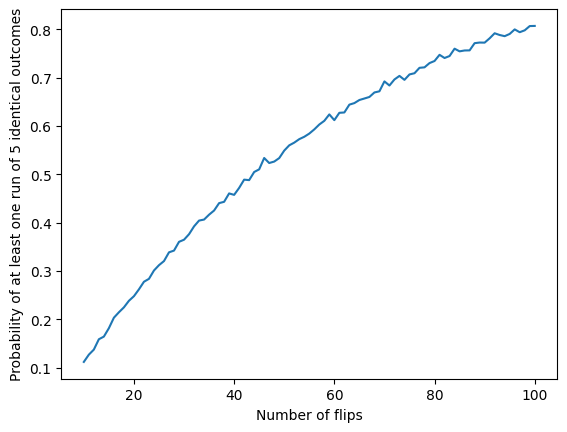

In [7]:
plt.plot(k_list, probability_list)
plt.xlabel("Number of flips")
plt.ylabel("Probability of at least one run of 5 identical outcomes")

## Problem 2 (20 points)

A “norepeatword” is a sequence of at least one (and possibly all) of the usual 26 letters a,b,c,. . . ,z, with repetitions not allowed. For example, “course” is a norepeatword, but “statistics” is not. Order matters, e.g., “course” is not the same as “source”.


Let $k$ represent the length of the norepeatword.

- 2.1 For a fixed length fixed length $k=10$, use python to calculate how many norepeatwords are there?

- 2.2 What is the maximum value of $k$?

- 2.3 Calculate the total number of norepeatwords for all possible values of $k$.

- 2.4 Suppose that a norepeatword is chosen randomly, with all norepeatwords equally likely, i.e., we choose one norepeatword among all norepeatwords “with equal likelihood.” Calculate the probability that the chosen norepeatword has length 26 and uses every letter.

- 2.5 Calculate the value of $1/e$, where constant $e$ represents the base of the natural logarithm. Calculate the difference between the probability in problem `2.4` and $1/e$. What do you observe? 


Hint: You can use `math.e` to get the value of $e$.  You can refer to Problem 4 on this [webpage](https://projects.iq.harvard.edu/sites/projects.iq.harvard.edu/files/stat110/files/strategic_practice_and_homework_1.pdf).

In [8]:
# 2.1
from scipy.special import factorial, comb
print(f"For k=10, there are {comb(26,10) * factorial(10)} nonrepeatwords")

For k=10, there are 19275223968000.0 nonrepeatwords


In [9]:
# 2.2
print("The max value of k is 26, because there are 26 letters in the alphabet, and you cannot repeat any letter in norepeatword")

The max value of k is 26, because there are 26 letters in the alphabet, and you cannot repeat any letter in norepeatword


In [10]:
# 2.3
n = np.arange(1,27)
sum = 0
for i in n:
    sum += comb(26,i) * factorial(i)
total_possible = sum
print(f"For all possible values k, there are {total_possible} nonrepeatwords")

For all possible values k, there are 1.0962598503531496e+27 nonrepeatwords


In [11]:
# 2.4 
probability = factorial(26) / total_possible
print("Probability of choosing a nonrepeat of length 26: ", probability)

Probability of choosing a nonrepeat of length 26:  0.3678794411714424


In [12]:
# 2.5
recp_e = 1 / math.e
print(f"Difference of probabilty and 1/3 is {recp_e - probability}. This is basically 0, so there is essentially no difference between the two.")


Difference of probabilty and 1/3 is -5.551115123125783e-17. This is basically 0, so there is essentially no difference between the two.


## Problem 3 (15 points)

You have a 6-sided die, but it is unbalanced. Instead of each face {1,2,3,4,5,6} having probability $1/6$, the probabilities are `[0.05, 0.1, 0.3, 0.2, 0.05, 0.3]`.


- 3.1 Set random seed in numpy as 1, and simulate rolling this unbalanced die 1,000 times. Print out the sequence of these 1000 outcome.
- 3.2 Calculate the empirical frequencies of rolling 1,2,3,4,5,6 based on your outcome.

- 3.3 Copmare it to the true probability $[0.05, 0.1, 0.3, 0.2, 0.05, 0.3]$. Explain your answers in words.

In [13]:
# 3.1
np.random.seed(1)
n = 1000
list_gen = np.random.choice([1,2,3,4,5,6], n, p = [0.05,0.1,0.3,0.2,0.05,0.3])
print(list_gen)

[3 6 1 3 2 2 3 3 3 4 3 5 3 6 1 5 3 4 2 3 6 6 3 5 6 6 2 1 3 6 2 3 6 4 5 3 5
 6 1 6 6 6 3 6 2 3 6 3 3 2 1 5 3 3 4 2 4 2 4 5 2 3 5 3 1 4 5 4 6 4 6 2 2 6
 3 3 6 3 6 6 6 4 6 3 3 6 3 6 5 4 2 6 3 4 3 3 6 4 1 4 3 4 6 3 6 4 1 6 5 6 3
 2 6 5 2 6 6 6 6 2 1 1 1 3 6 4 4 6 2 3 4 6 4 1 6 3 6 3 6 6 4 2 2 2 1 2 3 6
 4 1 2 6 4 3 3 6 3 4 6 6 3 4 4 6 3 1 2 4 4 4 3 6 4 3 4 6 5 3 2 3 4 3 6 2 3
 6 3 4 4 6 3 2 6 6 6 6 1 3 4 6 6 4 6 4 3 4 4 4 6 6 3 6 3 2 2 4 1 6 6 1 3 3
 2 6 3 6 4 6 6 6 4 4 6 3 4 4 1 4 3 6 3 6 4 3 6 4 2 3 5 6 1 6 3 6 4 6 4 4 3
 4 6 6 6 5 6 3 5 4 3 3 3 3 4 3 6 5 3 3 3 6 6 6 5 3 3 6 4 6 4 6 4 6 4 4 3 2
 3 2 6 3 6 6 5 4 3 4 3 3 4 3 6 6 3 2 3 4 6 3 3 6 3 4 3 2 4 4 3 4 4 5 2 6 3
 4 6 1 3 6 6 4 6 6 6 6 2 5 6 4 6 1 6 6 3 3 4 3 6 3 6 6 3 2 6 4 6 4 6 4 4 2
 3 1 3 6 1 3 6 5 5 3 3 4 6 3 3 3 6 4 2 4 3 6 3 1 4 6 3 6 4 4 6 6 1 6 4 6 3
 3 2 3 2 4 6 5 6 3 6 3 6 4 2 2 1 2 4 2 1 6 3 6 4 4 4 4 6 3 6 1 6 2 4 1 4 1
 6 6 6 6 2 3 3 4 6 6 6 6 6 3 3 3 2 6 2 3 6 3 6 3 4 3 6 3 3 4 6 1 6 6 1 4 3
 6 4 5 4 4 3 1 4 3 4 6 3 

In [14]:
# 3.2
num_ones = np.count_nonzero(list_gen == 1)
num_twos = np.count_nonzero(list_gen == 2)
num_threes = np.count_nonzero(list_gen == 3)
num_fours = np.count_nonzero(list_gen == 4)
num_fives = np.count_nonzero(list_gen == 5)
num_sixes = np.count_nonzero(list_gen == 6)
print(f"Number of 1s: {num_ones} \nNumber of 2s: {num_twos} \nNumber of 3s: {num_threes} \nNumber of 4s: {num_fours} \nNumber of 5s: {num_fives} \nNumber of 6s: {num_sixes}")

Number of 1s: 57 
Number of 2s: 97 
Number of 3s: 292 
Number of 4s: 206 
Number of 5s: 51 
Number of 6s: 297


In [15]:
# 3.3
prob_one = num_ones / n
prob_two = num_twos / n
prob_three = num_threes / n
prob_four = num_fours / n
prob_five = num_fives / n
prob_six = num_sixes / n
# .05,0.1,0.3,0.2,0.05,0.3
print(f"Probability of 1: {prob_one} vs Actual of 0.05 \nProbability of 2: {prob_two} vs Actual of 0.1\nProbability of 3: {prob_three} vs Actual of 0.3\nProbability of 4: {prob_four} vs Actual of 0.2\nProbability of 5: {prob_five} vs Actual of 0.05\nProbability of 6: {prob_six} vs Actual of 0.3")

Probability of 1: 0.057 vs Actual of 0.05 
Probability of 2: 0.097 vs Actual of 0.1
Probability of 3: 0.292 vs Actual of 0.3
Probability of 4: 0.206 vs Actual of 0.2
Probability of 5: 0.051 vs Actual of 0.05
Probability of 6: 0.297 vs Actual of 0.3


The empiricial probabilities are very close to the actual probabilities, but not quite equal. This is because the more trials you run, the closer the empirical probabilities will be to the actual probabilities. If we each trial had 10,000 or 100,000 rolls for each simulation, the empirical probabilities would be very close to the actual probabilities.

## Problem 4 (15 points)

A knock-out tournament is being held with $2^n$ tennis players. This means that for each round, the winners move on to the next round and the losers are eliminated, until only one person remains. For example, if initially there are $2^4$ = 16 players, then there are 8 games in the first round, then the 8 winners move on to round 2, then the 4 winners move on to round 3, then the 2 winners move on to round 4, the winner of which is declared the winner of the tournament. (There are various systems for determining who plays whom within a round, but these do not matter for this problem.) 


- 4.1 Suppose there are 32 players. You have a 80% probability of winning each game. What is the probability that you become the champion?

- 4.2 Repeat Problem 4.1 but now you have 90% probability of winning each game.

- 4.3 Create a line plot where the x-axis represents the probability of winning each game and the y-axis represents the probability of becoming the champion.

In [18]:
# 4.1
rounds = math.log(32, 2)
probability = math.pow(0.8,rounds)
print(f"Probability of becoming champion (or winning 5 rounds in a row), given an 80% probability to win each game, is {probability}")

Probability of becoming champion (or winning 5 rounds in a row), given an 80% probability to win each game, is 0.3276800000000001


In [20]:
# 4.2
rounds = math.log(32, 2)
probability = math.pow(0.9,rounds)
print(f"Probability of becoming champion (or winning 5 rounds in a row), given a 90% probability to win each game, is {probability}")

Probability of becoming champion (or winning 5 rounds in a row), given a 90% probability to win each game, is 0.5904900000000001


Text(0, 0.5, 'Probability of becoming champion')

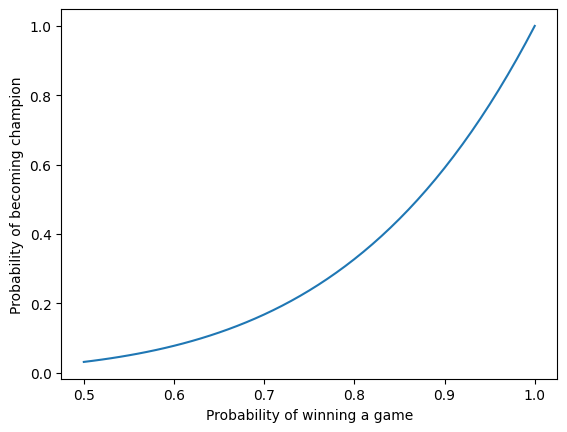

In [22]:
# 4.3
#line plot where x-axis is the probability of winning a game and y-axis is the probability of becoming champion
probabilities = np.arange(0.5,1.01,0.01)
champion_probabilities = []
for prob in probabilities:
    rounds = math.log(32, 2)
    probability = math.pow(prob,rounds)
    champion_probabilities.append(probability)

plt.plot(probabilities, champion_probabilities)
plt.xlabel("Probability of winning a game")
plt.ylabel("Probability of becoming champion")